# Quantum Computing with ProjectQ 

###  Huihuo Zheng  @ ALCF
### July 26, 2018 

git clone https://github.com/zhenghh04/QCWorkshop.git

or 

git pull 

QCWorkshop/Deutsch/Deutsch.ipynb

Email: huihuo.zheng@anl.gov

------------------------------------------------------

## How does a computer program look like?

<img, src="./qc_program.png", width=900, hight=900>

*** Quantum Program language/frameworks
* ProjectQ 
* Microsoft Q#
* IBM Qsikit 
* ...

List of existing quantum computing language: https://en.wikipedia.org/wiki/Quantum_programming


## ProjectQ
ProjectQ is an open-source software framework for quantum computing started at ETH Zuric (Matthias Troyer et at). It aims at providing tools which facilitate inventing, implementing, testing, debugging, and running quantum algorithms using either classical hardware or actual quantum devices.

Main features: 

* Use Python as the high level language to write quantum programs
* Use various hardware and software back-ends
* FermiLib for solving quantum chemistry progmes (fermionic problems) on a quantum computer


### Compiler Framework
<img src="http://2017.projectq.ch/wordpress/wp-content/uploads/2017/03/compiler_overview.gif">


The compilation framework consists of a main compiler engine, which executes a user-defined sequence of compilation steps by sending the circuit through a chain of so-called compiler engines. Each compiler engine manipulates the circuit to, e.g., reduce the number of gates or quantum bits required to run the quantum program. Engines further down the stack become more back-end-specific and take care of the mapping of the logical circuit to the layout of the back-end.

After the circuit has passed through all compiler engines, it gets sent to the back-end. The back-end may be actual quantum hardware, a simulator run on a classical computer, a circuit drawing engine, etc.

### Back-ends
After the circuit has passed through all compiler engines, it gets sent to the back-end. The back-end may be 
* actual quantum hardware (superconducting circuits, topological qubits, ion traps, spin qubits, and photonic qubits, etc); Current supported hardward (IBM Quantum Experience: IBM’s 5-qubit quantum computer.
* simulator run on a classical computer; 
* circuit drawing engine. 

### References

https://projectq.ch/

https://arxiv.org/abs/1612.08091

https://github.com/ProjectQ-Framework/ProjectQ

## Contents of Tutorials

* Fundamental gate operations
    * NOT
    * Hadamard 
    * CNOT
* Quantum Random Number Generator

* Bell state 

* Two-qubit Deutsch algorithm (Quantum Oracle)

* Quantum Fourier Transformation (exercise)

## Goal of this tutorials

* Get familar with qubit, gates, measurement;  

* Know how to implement given quantum circuits using projectq.


In [41]:
from __future__ import print_function
#Importing projectQ gates
from projectq import MainEngine
from projectq.ops import H, NOT, CNOT, Measure #Z, CZ, Swap, T, ...etc
import matplotlib.pylab as plt
import numpy as np

#use simulator engine 
eng = MainEngine()

## To use IBM quantum experience backend. 
#from projectq.backends import IBMBackend
#eng = MainEngine(IBMBackend(),
#                 engine_list=projectq.setups.ibm.get_engine_list())
#To use Quantum Experience, please register an account
#    https://quantumexperience.ng.bluemix.net/qx/signup

def print_wavefunction(qureg, opt='nonzero'):
  # print wavefunction
    eng.flush()
    nqubits=len(qureg)
    mask='0%sb'%nqubits
    #Make sure all previous commands have passed through the compilation chain.
    print("   |Psi> = ", end='')
    i=0
    for s in range(2 ** nqubits):
        bit_string = format(s, mask)
        result=eng.backend.get_amplitude(bit_string, qureg)
        if (opt.find('all')!=-1):
            print("%.1f|%s> " % (result.real,bit_string), end='')
            if (s<2**nqubits-1):
                print("+", end='')
        else:       
            if (abs(result)!=0.0):
                if i != 0 and result.real >0: print("+ ", end='')
                if (result.imag==0):
                    print("%.2f|%s> " % (result.real,bit_string), end='')
                elif (result.imag>0):
                    print("(%.2f+%.2fi)|%s> " % (result.real, result.imag,bit_string), end='')
                else:
                    print("(%.2f%.2fi)|%s> " % (result.real, result.imag,bit_string), end='')

                i=i+1
    print()
    return

def measure_qubits(qureg):
    Measure | qureg
    eng.flush()
    i=0
    try:
        for q in qureg:
            print("   Measured Q{}: |{}>".format(i, int(q)))### multiple qubit case
            i=i+1
    except:
        print("   Measured: |{}>".format(int(qureg))) ### single qubit
    return 

(Note: This is the (slow) Python simulator.)


## Fundamental gate operations
### Allocating two qubits
We initialize a two qubit state: 
   
   $|\Psi\rangle = |00\rangle$

both are at |0> state.

In [42]:
# initialize variables
from projectq import MainEngine

eng = MainEngine() ## engine
nqubits=2
print("\n*Allocate %s qubits" %nqubits)

qureg = eng.allocate_qureg(nqubits) ### allocate_qubit() -- single qubit
## allocate 2 qubit, stored at qureg, 
# the qubit could be accessed as qureg[0], qureg[1]
print_wavefunction(qureg, 'all')

(Note: This is the (slow) Python simulator.)

*Allocate 2 qubits
   |Psi> = 1.0|00> +0.0|01> +0.0|10> +0.0|11> 


## NOT gate (or X gate)

* NOT gate transformation

    $|0\rangle \longrightarrow |1\rangle$

    $|1\rangle \longrightarrow |0\rangle$


* Matrix representation is 

    NOT = $\left(
    \begin{matrix}
    0 & 1 \\
    1 & 0
    \end{matrix}\right)
    $. 
This is the Pauli $\sigma_x$ matrix.

In [43]:
print("*Initial state")
print_wavefunction(qureg)
print("\n*Apply NOT gate to Q0")
NOT | qureg[0] # Syntax for gate operation is : op | qubit
print_wavefunction(qureg)
print("\n*Apply NOT gate to Q1")
NOT | qureg[1]
print_wavefunction(qureg)

*Initial state
   |Psi> = 1.00|00> 

*Apply NOT gate to Q0
   |Psi> = 1.00|10> 

*Apply NOT gate to Q1
   |Psi> = 1.00|11> 


--------------------------
## Hadamard (H) gate

* Hadamard transformation

    $|0\rangle \longrightarrow \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$ 

    $|1\rangle \longrightarrow \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$ 

* The matrix representation is: 

    H = $
\frac{1}{\sqrt{2}}\left(
\begin{matrix}
1 & 1 \\
1 & -1
\end{matrix}\right)
$

* Two Hadamard gate together equals to identify

    $H\times H=I$

The circuit is 
<img src="hadamard.png">

In [34]:
from projectq import MainEngine
eng = MainEngine() ## engine
nqubits=2
qureg = eng.allocate_qureg(nqubits) 
print("*Initial state")
print_wavefunction(qureg)
print("\n*Apply Hadamard gate to Q0")
H | qureg[0]
print_wavefunction(qureg)
print("\n*Apply Hadamard gate to Q1")
H | qureg[1]
print_wavefunction(qureg)
Measure | qureg
print("\n*Measure the state")
print_wavefunction(qureg)
del(qureg)

(Note: This is the (slow) Python simulator.)
*Initial state
   |Psi> = 1.00|00> 

*Apply Hadamard gate to Q0
   |Psi> = 0.71|00> + 0.71|10> 

*Apply Hadamard gate to Q1
   |Psi> = 0.50|00> + 0.50|01> + 0.50|10> + 0.50|11> 

*Measure the state
   |Psi> = 1.00|10> 


---------------
## CNOT

Control NOT: apply NOT to a qubit if the control qubit is at state |1>: 

The operation of CNOT is as follows (the first qubit is the control qubit):


$
 \quad |\underline{0}0\rangle \longrightarrow|\underline{0}0\rangle\\
\quad |\underline{0}1\rangle  \longrightarrow |\underline{0}1\rangle\\
\quad |\underline{1}0\rangle  \longrightarrow|\underline{1}1\rangle\\
\quad |\underline{1}1\rangle  \longrightarrow |\underline{1}0\rangle
$

Matrix representation of CNOT operator is: 

CNOT = $
\left(
\begin{matrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 
\end{matrix}\right)
$

The circuit for the CNOT gate is:
<img, src="cnot.png">

In [35]:
print("*Allocate 2 qubits: ")
nqubits=2
mask='02b'
qureg = eng.allocate_qureg(nqubits)

print_wavefunction(qureg)
print("\n*CNOT Q0->Q1")
CNOT | (qureg[0], qureg[1])  
## operate on the second qubit based on the state of the first qubit

print_wavefunction(qureg)
NOT | qureg[0]
print("\n*Apply NOT gate to Q0 ")
print_wavefunction(qureg)
print("\n*CNOT Q0->Q1")
CNOT | (qureg[0], qureg[1])  ## operate on the second qubit based on the state of the first qubit
print_wavefunction(qureg)
print("\n*CNOT Q1->Q0")
CNOT | (qureg[1], qureg[0])  
print_wavefunction(qureg)
del(qureg)

*Allocate 2 qubits: 
   |Psi> = 1.00|00> 

*CNOT Q0->Q1
   |Psi> = 1.00|00> 

*Apply NOT gate to Q0 
   |Psi> = 1.00|10> 

*CNOT Q0->Q1
   |Psi> = 1.00|11> 

*CNOT Q1->Q0
   |Psi> = 1.00|01> 


----------------------
## Quantum Random Number Generator

If a qubit is in a linear superposition state:
$$
|\psi\rangle = \frac{1}{\sqrt{2}}\Big(|0\rangle + |1\rangle \Big)
$$
after measurement, it will collapse to $|0\rangle$ or $|1\rangle$, each with 50% probability. This is a natural "true" random number generator for 0, 1. Classical computers could only produce quasi random generators. 

We could rotate the qubit back to linear superposition state using Hadamard gate: 
$$
H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)\\
H|1\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)
$$
We could do measurement-> H -> measurement -> H to get multiple random number [0, 1].

<img, src="qcrnd.png">

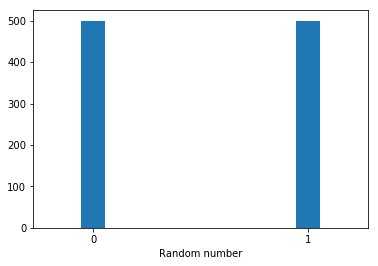

In [36]:
def QRng(m=100):
    # allocate one qubit
    q1 = eng.allocate_qubit()
    R =[]
    for i in range(m):
        # superposition state
        H | q1
        # measure
        Measure | q1
        R.append(int(q1))
    eng.flush()
    del(q1)
    return R
R = QRng(1000)
plt.hist(R)
plt.xlim(-0.2, 1.2)
plt.xticks([0.05, 0.95], [0, 1])
plt.xlabel("Random number")
plt.show()

## Generate random number [0, N-1], $2^n = N$ 

In [44]:
## Generate random number between [0, 16)
def QRngN(m=0, n=4):
    # allocate one qubit
    q1 = eng.allocate_qubit()
    R=[]
    for i in range(m):
        # single random number 
        p=0
        for j in range(n):
            H | q1
            Measure | q1
            p=2*p+int(q1) ## map bits to base 10 number
        R.append(p)
    eng.flush()
    del(q1)
    return R

print(QRngN(10)) ## measure 4 times to get a single number. 

[0, 15, 5, 10, 1, 6, 3, 14, 1, 6]


### Exercise: generate random number using multiple qubits
We could also directly use multiple qubits. For n qubit, we could create "maximum" superposition state: 
$$
|0\rangle^{\otimes^n}\longrightarrow^H |\psi\rangle_n =  \frac{1}{\sqrt{2}}\Big(|0\rangle + |1\rangle \Big)\otimes \frac{1}{\sqrt{2}}\Big(|0\rangle + |1\rangle \Big)\otimes  \frac{1}{\sqrt{2}}\Big(|0\rangle + |1\rangle \Big)...\\
$$
$$
|\psi\rangle_3=\frac{1}{\sqrt{8}}\Big(|000\rangle + |001\rangle + |010\rangle + |011\rangle  +|100\rangle + |101\rangle + |110\rangle + |111\rangle\Big)\\
=\frac{1}{\sqrt{8}}\Big(|0\rangle_{10} + |1\rangle_{10} + |2\rangle_{10}  +|3\rangle_{10}  +|4\rangle_{10}+|5\rangle_{10}  +|6\rangle_{10}+|7\rangle_{10}\Big)
$$
Now if we measure all the qubits simuataneously, it will collapse to one of the eight state with equal probability. 

------------------------


## Bell state

The Bell states are for specific maximally entangled quantum states of two qubits.

$$
|\Psi\rangle = \frac{1}{\sqrt{2}} \Big(|00\rangle + |11\rangle\Big)
$$
The following state, 
$$
|\Psi\rangle = \frac{1}{2}\Big(|00\rangle + |01\rangle + |10\rangle + |11\rangle\Big) = \frac{1}{\sqrt{2}}\Big(|0\rangle + |1\rangle \Big)\otimes \frac{1}{\sqrt{2}}\Big(|0\rangle + |1\rangle \Big)
$$
is not an entangled state. 

Question: how to create such a Bell state from the initial state $|00\rangle$?



<img src="https://projectq.readthedocs.io/en/latest/_images/bellpair_circuit.png", width=250, height=250>

$$
|00\rangle \longrightarrow^H \frac{1}{\sqrt{2}}\Big(|0\rangle + |1\rangle)|0\rangle\Big) \longrightarrow^{CNOT} \frac{1}{\sqrt{2}} \Big(|00\rangle + |11\rangle\Big)
$$

In [52]:
from projectq import MainEngine
eng = MainEngine()
print("*Initial state: ")

bell = eng.allocate_qureg(2)
print_wavefunction(bell)
print("\n*Entangle the state")
H | bell[0]
CNOT | (bell[0], bell[1])
print_wavefunction(bell)
print("\nMeasure the state")
Measure | bell
print_wavefunction(bell)
del(bell)

(Note: This is the (slow) Python simulator.)
*Initial state: 
   |Psi> = 1.00|00> 

*Entangle the state
   |Psi> = 0.71|00> + 0.71|11> 

Measure the state
   |Psi> = 1.00|00> 


--------
#### Exercise 1: implement a quatum teleportation
<img, src="https://projectq.readthedocs.io/en/latest/_images/teleport_circuit.png", width=400, height=400>

https://projectq.readthedocs.io/en/latest/examples.html

#### Exercise2: create a multiple qubit entangled state?

$$
|\Psi\rangle = \frac{1}{\sqrt{2}} (|00\cdots 00\rangle + |11\cdots 11\rangle )
$$

-----------------

## Deutsch algorithm

In the Deutsch-Jozsa problem, we are given a black box quantum computer known as an oracle that implements some function 
$$
f:\{0,1\}^{n}\rightarrow \{0,1\}. 
$$ 
In other words, it takes n-digit binary values as input and produces either a 0 or a 1 as output for each such value. We are promised that the function is either "constant" (0 on all outputs or 1 on all outputs) or "balanced" (returns 1 for half of the input domain and 0 for the other half); 

For a two-bit example:
* Constant: 
$$
f(00) = f(01) = f(10) = f(11) =1
$$
* Balanced:
$$
f(00) = f(01) =0, \quad f(10) = f(11) =1
$$

###### For an n-qubit input, in the worst case, one has to check f(x) for $2^n/2$ times. Therefore, the complexity of the Oracle problem is O($2^n$). 

### Quantum Supremacy / Advantage
We will show that using quantum algorithm, we are able to do this in O(n) complexity, i.e., the number of gate operation in the order of n. 

We assume there is a quantum Oracle

$$ U_f |x\rangle |y\rangle = |x\rangle|f(x)\oplus y\rangle $$

Then the problem could be done by the following quantum circuit (Deutsch-Jozsa algorithm): 

<img src="dja.svg">

One could measure the first n qubit, if it is $|0\rangle^{\otimes n}$, f is constant; otherwise, f is constant. 
###### The total number of gates is 2n+1. The complexity of Quantum Oracle problem is O(n). 



The algorithm is quite simple as follows.
1. Prepare two quantum registers initialized to zero. The first is an $n$-qubit reqister for querying the oracle, and the second is a one-qubit register for storing the answer of the oracle
$$
|0\ldots 0\rangle |1\rangle
$$
2. Create the superposition of all input queries in the first register by applying the Hadamard gate to each qubit.
$$
H^{\otimes^{n}} |0\ldots 0\rangle |1\rangle = \frac{1}{\sqrt{2^n}}\sum_{i=0}^{2^n-1}|i\rangle_{10} |1\rangle 
$$
3. Apply the Hadamard gate to n qubit. This is to store the answer of the oracle in the phase.
$$
\frac{1}{\sqrt{2^n}}\sum_{i=0}^{2^n-1}|i\rangle_{10} |0\rangle \rightarrow \frac{1}{\sqrt{2^{n+1}}}\sum_{i=0}^{2^n-1}|i\rangle_{10} ( |0\rangle - |1\rangle )
$$
4. Query the oracle
$$
U_f\frac{1}{\sqrt{2^{n+1}}}\sum_{i=0}^{2^n-1}|i\rangle_{10} ( |0\rangle - |1\rangle ) \rightarrow \frac{1}{\sqrt{2^{n+1}}}\sum_{i=0}^{2^n-1}(-1)^{f(i)}|i\rangle_{10} ( |0\rangle - |1\rangle ) 
$$
5. Apply the Hadamard gate to the first n qubits again, 

6. Measure the first n qubits. 
$$
P(|0\rangle^{\otimes^n})=\Big|\frac{1}{2^n}\sum_x (-1)^{f(x)}\Big|^2
$$
If it is non-zero, then conclude that the hidden Boolean function is balanced. Otherwise, conclude that it is constant. 

The correctness of the conclusion of the last step can be explained as follows. 

When the hidden Boolean function is constant, the quantum states before and after querying the oracle are the same. The inverse of the Hadamard gate is the Hadamard gate itself. Thus, by Step 5, we essentially reverse Step 2 to obtain the initial quantum state of all-zero at the first register.  

When the hidden Boolean function is balanced, the quantum state after querying the oracle is orthogonal to the quantum state before querying the oracle. Thus, by Step 5, when reverting the operation, we must end up with a quantum state that is orthogonal to the initial quantum state of all-zero at the first register. This means we should never obtain the all-zero state. 


For details, please see the wikipedia page: 
https://en.wikipedia.org/wiki/Deutsch%E2%80%93Jozsa_algorithm

### Two-qubit example (Deutsch's algorithm)
Deutsch's algorithm is a special case of the general Deutsch–Jozsa algorithm. We need to check the condition $f(0)=f(1)$. It is equivalent to check $f(0)\oplus f(1)$ (where  $\oplus$  is addition modulo 2, which can also be viewed as a quantum XOR gate implemented as a Controlled NOT gate), if zero, then $f$ is constant, otherwise $f$ is not constant.

We begin with the two-qubit state (the second qubit is needed to create interference)

$$|\Psi_0\rangle = |0\rangle |1\rangle$$.   

* apply a Hadamard transform to each qubit. This yields

$$|\Psi_1\rangle ={\frac  {1}{2}}(|0\rangle +|1\rangle )(|0\rangle -|1\rangle ).$$


* apply Oracle: we are given a quantum implementation of the Oracle function $f$ that maps $U_f|x\rangle |y\rangle \to |x\rangle |f(x)\oplus y\rangle$. 


$$U_f|\Psi_1\rangle = {\frac{1}{2}}\left(|0\rangle (|f(0)\oplus 0\rangle -|f(0)\oplus 1\rangle \right)+|1\rangle \left(|f(1)\oplus 0\rangle -|f(1)\oplus 1\rangle \right)\\
=\frac{1}{2}((-1)^{f(0)}|0\rangle (|0\rangle - |1\rangle + (-1)^{-1}|1\rangle (|0\rangle - |1\rangle))\\
=(-1)^{f(0)}\frac{1}{2}\left(|0\rangle + (-1)^{f(0)\oplus f(1)}|1\rangle\right)(|0\rangle - |1\rangle)
.$$

We ignore the last bit and the global phase and therefore have the state

$$|\Psi_{Q_0}\rangle= \frac {1}{\sqrt {2}}(|0\rangle +(-1)^{f(0)\oplus f(1)}|1\rangle ).$$


* Applying a Hadamard transform to this state we have

$$H|\Psi_{Q_0}\rangle = \frac  {1}{2}(|0\rangle +|1\rangle +(-1)^{{f(0)\oplus f(1)}}|0\rangle -(-1)^{{f(0)\oplus f(1)}}|1\rangle )\\ ={\frac  {1}{2}}\Big([1+(-1)^{{f(0)\oplus f(1)}}]|0\rangle +[1-(-1)^{{f(0)\oplus f(1)}}]|1\rangle \Big).$$

We see that 

* if $f(0)=f(1)$, 
$$|\Psi_f\rangle = \frac{1}{\sqrt{2}}|0\rangle(|0\rangle -|1\rangle )$$
* if $f(0)\ne f(1)$, 
$$|\Psi_f\rangle = \frac{1}{\sqrt{2}}|1\rangle(|0\rangle -|1\rangle )$$


In [39]:
# initialize variables
from projectq import MainEngine
eng = MainEngine()
nqubits=2
mask='02b'
# allocate qubits
qureg = eng.allocate_qureg(nqubits)
NOT | qureg[1]

def Oracle(qureg, f=[0, 1]):
    if (f[0]==f[1]):
        print("   Constant oracle: f(0)=f(1)=%s"%(f[0]))
        if (f==1):
            NOT | qureg[1]
        return
    print("   Balanced oracle: f(0)=%s, f(1)=%s"%(f[0], f[1]))
    if f[0]==0:
        CNOT | (qureg[0], qureg[1])
    else:
        CNOT | (qureg[0], qureg[1])
        NOT | qureg[1]
    return 
print("\n*Inital state |01>: ")
print_wavefunction(qureg)
print("\n*Apply Hadamard to each qubit: ")
# apply gates
H | qureg[0]
H | qureg[1]
print_wavefunction(qureg)

print("\n*Apply Oracle: ")

Oracle(qureg, f=[0, 0])

print_wavefunction(qureg)

print("\n*Apply Hadamard to Q0 and Q1")
H | qureg[0]
H | qureg[1]
print_wavefunction(qureg)
# measure qubits
print("\n*Measure the first qubit")
measure_qubits(qureg[0])
del(qureg)

(Note: This is the (slow) Python simulator.)

*Inital state |01>: 
   |Psi> = 1.00|01> 

*Apply Hadamard to each qubit: 
   |Psi> = 0.50|00> -0.50|01> + 0.50|10> -0.50|11> 

*Apply Oracle: 
   Constant oracle: f(0)=f(1)=0
   |Psi> = 0.50|00> -0.50|01> + 0.50|10> -0.50|11> 

*Apply Hadamard to Q0 and Q1
   |Psi> = 1.00|01> 

*Measure the first qubit
   Measured: |0>


### Exercise: Multiple-qubit example (Deutsch-Josaz algorithm)

In [46]:
from projectq import MainEngine 
eng = MainEngine()
n=4
def BalancedOracleSEED(n=10):
    return np.random.randint(1, 2**n)
f=np.zeros(2**n)
s=BalancedOracleSEED(n)
def QuantumOracle(qureg, type='balanced', ind=s):
    n=len(qureg)-1
    if (type=='balanced'):    
        for i in range(n):
            if (ind & (1 << i)):
                CNOT | (qureg[i], qureg[n])
        return
    elif (type=='0'):
        return 
    else:
        NOT | qureg[n]
        return 
qureg = eng.allocate_qureg(n+1)
NOT | qureg[n]
print("\n*Initial wave function")
print_wavefunction(qureg)
for i in range(n):
    H | qureg[i]
H | qureg[n]
print("\n*Applying Hadamard")
print_wavefunction(qureg)
print("\n*Applying Oracle")
QuantumOracle(qureg, 'balanced', ind=s)
print_wavefunction(qureg)
print("\n*Applying Hadamard")
for i in range(n):
    H | qureg[i]
print_wavefunction(qureg)
print("\n*Measure")
Measure | qureg
print_wavefunction(qureg)
del(qureg)


(Note: This is the (slow) Python simulator.)

*Initial wave function
   |Psi> = 1.00|00001> 

*Applying Hadamard
   |Psi> = 0.18|00000> -0.18|00001> + 0.18|00010> -0.18|00011> + 0.18|00100> -0.18|00101> + 0.18|00110> -0.18|00111> + 0.18|01000> -0.18|01001> + 0.18|01010> -0.18|01011> + 0.18|01100> -0.18|01101> + 0.18|01110> -0.18|01111> + 0.18|10000> -0.18|10001> + 0.18|10010> -0.18|10011> + 0.18|10100> -0.18|10101> + 0.18|10110> -0.18|10111> + 0.18|11000> -0.18|11001> + 0.18|11010> -0.18|11011> + 0.18|11100> -0.18|11101> + 0.18|11110> -0.18|11111> 

*Applying Oracle
   |Psi> = 0.18|00000> -0.18|00001> + 0.18|00010> -0.18|00011> -0.18|00100> + 0.18|00101> -0.18|00110> + 0.18|00111> + 0.18|01000> -0.18|01001> + 0.18|01010> -0.18|01011> -0.18|01100> + 0.18|01101> -0.18|01110> + 0.18|01111> + 0.18|10000> -0.18|10001> + 0.18|10010> -0.18|10011> -0.18|10100> + 0.18|10101> -0.18|10110> + 0.18|10111> + 0.18|11000> -0.18|11001> + 0.18|11010> -0.18|11011> -0.18|11100> + 0.18|11101> -0.18|11110> 

--------------------
## Exercises: implement 3-qubit Quantum Fourier Transition from the following circuit

* Implementing a four qubit Quantum Fourier Transformation according to the following quantum circuit.
<img, src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/Q_fourier_3qubits.png/1200px-Q_fourier_3qubits.png">

R is a phase operation: 
$$
R_m = \left(\begin{matrix}
1 & 0 \\
0 & \omega_m
\end{matrix}\right), \quad \omega_m = e^{\frac{2\pi i}{2^m}}
$$

In [11]:
from projectq import MainEngine
from projectq.ops import H, NOT, CNOT, Measure, Rz, R, CRz, QFT

----------------
## Useful resources
* projectq tutorials: https://github.com/ProjectQ-Framework/ProjectQ
* Qiskit tutorials: https://github.com/Qiskit/qiskit-tutorial
* Quantum altorighm implementations for beginners: https://arxiv.org/pdf/1804.03719.pdf
